In [ ]:
#Kotaliege Data Scraping
from selenium import webdriver
from selenium.common.exceptions import NoSuchElementException
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import pandas as pd
import time

driver = webdriver.Chrome()
driver.get("https://www.kotaliege.be/en/search?rentalDurations%5B0%5D=100")

wait = WebDriverWait(driver, 10)
results_df = pd.DataFrame()
def click_next():
    next_button = driver.find_element(By.XPATH, '//*[@id="mm-0"]/div[2]/div/div/div[1]/div[2]/div[2]/div[1]/ul/li[7]/a')
    next_button.click()
def next_click():
    next_button2 = driver.find_element(By.XPATH, '//*[@id="mm-0"]/div[2]/div/div/div[1]/div[2]/div[2]/div[1]/ul/li[8]/a')
    next_button2.click()
def next_next():
    next_button3 = driver.find_element(By.XPATH, '//*[@id="mm-0"]/div[2]/div/div/div[1]/div[2]/div[2]/div[1]/ul/li[9]/a')
    next_button3.click()

def scrape_page_data():
    page_data = []
    
    
    listings = driver.find_elements(By.XPATH, '//*[@id="search-results"]/div')
    for listing in listings:
        try:
            h2_element = listing.find_element(By.XPATH, './/header/h2/a')
            h3_element = listing.find_element(By.XPATH, './/header/h3')
            p_element = listing.find_element(By.XPATH, './/header/p/span[1]')
            print(h2_element.text)
            print(h3_element.text)
            print(p_element.text)
            page_data.append({
                'Title': h2_element.text,
                'Subtitle': h3_element.text,
                'Price': p_element.text
            })
        except NoSuchElementException:
            if page_number < 3:
                click_next()
                time.sleep(5)
            elif page_number == 3:
                next_click()
                time.sleep(5)
            elif page_number >= 4:
                next_next()
                time.sleep(5)
            elif page_number > 10:
                next_click()
                time.sleep(5)
    return page_data



for page_number in range(1, 10):
    print(f"Scraping page {page_number}...")
    page_dt = scrape_page_data()
    results_df = results_df.append(page_dt, ignore_index=True)

results_df.to_excel("results.xlsx", index=False)

In [ ]:
#Immoweb Data Scraping
from selenium import webdriver
from selenium.webdriver.common.by import By
import pandas as pd
import time
from openpyxl.workbook import Workbook
from selenium.common.exceptions import NoSuchElementException

url = 'https://www.immoweb.be/fr/recherche/appartement/a-louer/liege/arrondissement?countries=BE&propertySubtypes=KOT,FLAT_STUDIO&page=1&orderBy=relevance'
driver = webdriver.Chrome()
driver.get(url)
driver.maximize_window()
time.sleep(5)
driver.execute_script('''return document.querySelector('div#usercentrics-root').shadowRoot.querySelector('button[data-testid="uc-accept-all-button"]')''').click()
class House:
    def __init__(self, name, price, type, caracteristics, state, place):
        self.name = name
        self.price = price
        self.type = type
        self.caracteristics = caracteristics
        self.state = state
        self.place = place

houses_objects = []

def retriever():

    houses = driver.find_element(By.XPATH, '//*[@id="main-content"]')
    houseslist = houses.find_elements(By.TAG_NAME, "li")

    houses_text = []

    for house in houseslist:
        try:
            houses_text.append(house.text)
        except:
            pass

    for t in houses_text:
        print(t)
        print("-------")

    for x in houses_text:
        temporary_houses_list = x.split("\n")
        for p in temporary_houses_list:
            if "€" in p:
                right_place = None
                right_name = None
                state = None
                try :
                    right_place = temporary_houses_list[-2]
                except:
                    pass

                if temporary_houses_list[-1] == "NOUVEAU" or temporary_houses_list[-1] == "SOUS OPTION":
                    right_name = temporary_houses_list[-2]
                    right_place = temporary_houses_list[-3]
                elif temporary_houses_list[-1] != "NOUVEAU":
                    right_name = temporary_houses_list[-1]
                    right_place == temporary_houses_list[-2]
                right_type = None
                if temporary_houses_list[0] == "Sponsorisé":
                    right_type = temporary_houses_list[1]
                    state = "sponsored"
                elif temporary_houses_list[0] != "Sponsorisé":
                    right_type = temporary_houses_list[0]
                    state = "Normal"
                right_caracteristics = None
                if temporary_houses_list[0] == "Sponsorisé":
                    right_caracteristics = temporary_houses_list[5]
                elif temporary_houses_list[0] != "Sponsorisé" and len(temporary_houses_list) > 8:
                    right_caracteristics = temporary_houses_list[3] + temporary_houses_list[4] + temporary_houses_list[5]
                elif len(temporary_houses_list) < 9:
                    try :
                        right_caracteristics = temporary_houses_list[3] + temporary_houses_list[4]
                    except:
                        pass
                hh = House(p, right_name, right_type, right_caracteristics, state, right_place)
                houses_objects.append(hh)
                break

        for infos in houses_objects:
            print(infos.name)
            print(infos.price)
            print(infos.type)
            print(infos.caracteristics)
            print(infos.state)
            print(infos.place)
            print("--------------")

    time.sleep(1)
    print(houses_objects)
    print(len(houses_objects))

for pagina in range(2, 7):
    time.sleep(2)
    next_page02 = driver.find_element(By.XPATH, f'//*[@id="searchResults"]/div[3]/div/div[1]/div[1]/div[1]/div/div[1]/div/nav/ul/li[{pagina}]/a/span[2]')
    next_page02.click()
    retriever()
    time.sleep(2)

for z in range(6):
    dee = 6
    time.sleep(2)
    try:
        next_page_button = driver.find_element(By.XPATH, f'//*[@id="searchResults"]/div[3]/div/div[1]/div[1]/div[1]/div/div[1]/div/nav/ul/li[{dee}]/a/span[2]')
        next_page_button.click()
        retriever()
    except NoSuchElementException:
        print("No next button found. Reached the last page.")
        break
    time.sleep(2)

print(len(houses_objects))

excel_array = []

for object in houses_objects:
    object_array = []
    if object.state == "Sponsorisé":
        pass
    else:
        object_array.append(object.name)
        object_array.append(object.price)
        object_array.append(object.type)
        object_array.append(object.caracteristics)
        object_array.append(object.place)
        excel_array.append(object_array)

df = pd.DataFrame(excel_array, columns=["Price", "Name", "Type", "Caracteristics", "Place"])
df.to_excel("studenthousingimmo.xlsx")


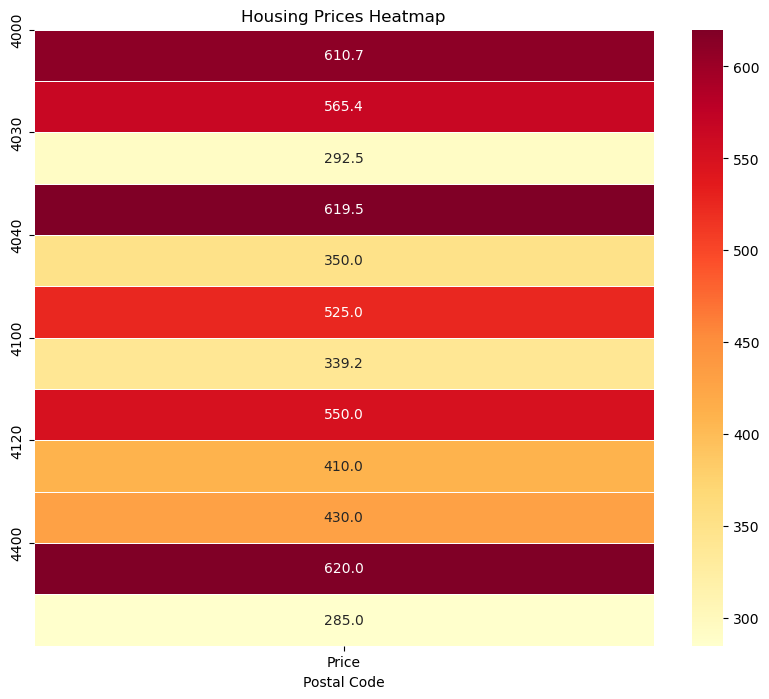

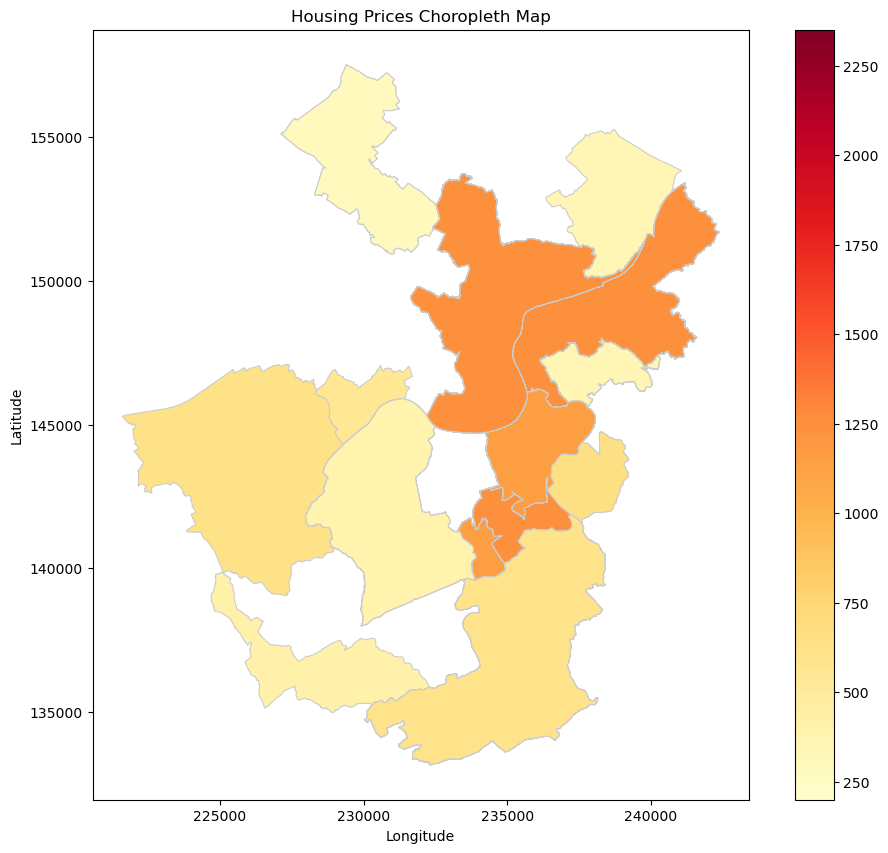

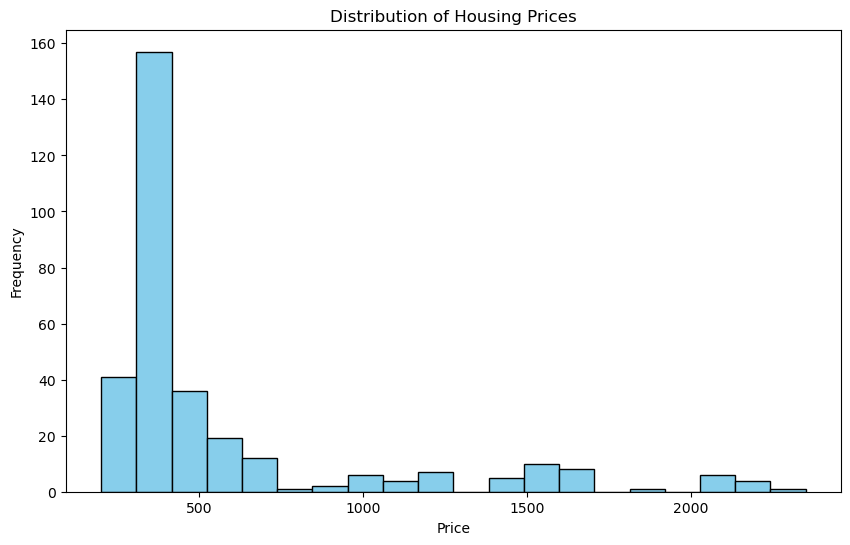

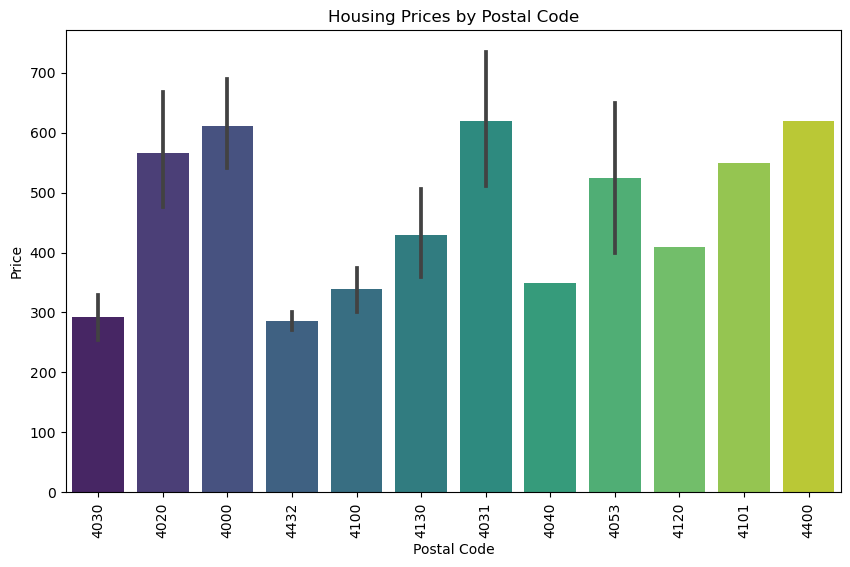

In [10]:
#Data Visualization of a dataset containing scraped data from both sites 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd

data = pd.read_excel('KAL Immo Scraped Data.xlsx')
pivot_table = data.pivot_table(values='Price', index='Subtitle')
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, cmap='YlOrRd', annot=True, fmt=".1f", linewidths=0.5)
plt.title('Housing Prices Heatmap')
plt.xlabel('Postal Code')
plt.ylabel('')
plt.yticks(range(0, len(pivot_table.index), 2), pivot_table.index[::2])

plt.show()

shapefile_path = 'postal_codes_shapefile.shp'  
map_df = gpd.read_file(shapefile_path)

data['Subtitle'] = data['Subtitle'].astype(str)

merged_data = map_df.merge(data, left_on='nouveau_PO', right_on='Subtitle', how='left')

fig, ax = plt.subplots(figsize=(12, 10))
merged_data.plot(column='Price', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Housing Prices Choropleth Map')

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

plt.show()

plt.figure(figsize=(10, 6))
plt.hist(data['Price'], bins=20, color='skyblue', edgecolor='black')

plt.title('Distribution of Housing Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='Subtitle', y='Price', palette='viridis')

plt.title('Housing Prices by Postal Code')
plt.xlabel('Postal Code')
plt.ylabel('Price')

plt.xticks(rotation=90)

plt.show()

In [1]:
# Data modelling using data from Kotaliege only
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

data = pd.read_excel('KAL Scraped Data.xlsx')

X = data['Subtitle'].values.reshape(-1, 1)  
y = data['Price']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = (mse ** 0.5)
r2 = r2_score(y_test, y_pred)

print('Evaluation on Test Set:')
print('-----------------------')
print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)
print('R-squared (R2):', r2)
print()

new_data = pd.DataFrame({'Subtitle': [4000, 4031, 4020, 4130, 4030, 4432, 4040, 4120, 4053, 4100]})  
predicted_prices = model.predict(new_data)

print('Predictions on New Data:')
print('------------------------')
for postal_code, predicted_price in zip(new_data['Subtitle'], predicted_prices):
    print(f"Postal Code {postal_code}: Predicted Price = {predicted_price:.2f}")


Evaluation on Test Set:
-----------------------
Mean Squared Error (MSE): 1679.3495263401578
Root Mean Squared Error (RMSE): 40.97986732946018
R-squared (R2): -0.06741763302648485

Predictions on New Data:
------------------------
Postal Code 4000: Predicted Price = 354.96
Postal Code 4031: Predicted Price = 350.76
Postal Code 4020: Predicted Price = 352.25
Postal Code 4130: Predicted Price = 337.37
Postal Code 4030: Predicted Price = 350.90
Postal Code 4432: Predicted Price = 296.53
Postal Code 4040: Predicted Price = 349.55
Postal Code 4120: Predicted Price = 338.73
Postal Code 4053: Predicted Price = 347.79
Postal Code 4100: Predicted Price = 341.43


C:\Users\amine\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [7]:
#Data from both Kotaliege and Immoweb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

data = pd.read_excel('KAL Immo Scraped Data.xlsx')
X = data['Subtitle'].values.reshape(-1, 1)  
y = data['Price']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = (mse ** 0.5)
r2 = r2_score(y_test, y_pred)

print('Evaluation on Test Set:')
print('-----------------------')
print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)
print('R-squared (R2):', r2)
print()

new_data = pd.DataFrame({'Subtitle': [4000, 4031, 4020, 4130, 4030, 4432, 4040, 4120, 4053, 4100]})  # Replace with new postal codes
predicted_prices = model.predict(new_data)

print('Predictions on New Data:')
print('------------------------')
for postal_code, predicted_price in zip(new_data['Subtitle'], predicted_prices):
    print(f"Postal Code {postal_code}: Predicted Price = {predicted_price:.2f}")


Evaluation on Test Set:
-----------------------
Mean Squared Error (MSE): 191170.8383151351
Root Mean Squared Error (RMSE): 437.2308752994636
R-squared (R2): 0.005701711767238993

Predictions on New Data:
------------------------
Postal Code 4000: Predicted Price = 608.08
Postal Code 4031: Predicted Price = 582.11
Postal Code 4020: Predicted Price = 591.33
Postal Code 4130: Predicted Price = 499.18
Postal Code 4030: Predicted Price = 582.95
Postal Code 4432: Predicted Price = 246.21
Postal Code 4040: Predicted Price = 574.57
Postal Code 4120: Predicted Price = 507.56
Postal Code 4053: Predicted Price = 563.68
Postal Code 4100: Predicted Price = 524.31


C:\Users\amine\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
